In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 6.2 Data cleaning and preparation

In [2]:
df = pd.read_csv('CreditScoring.csv')

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [5]:
status_values = {1:'ok',
                 2:'default',
                 0:'unk'}
df.status = df.status.map(status_values)

In [6]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [10]:
for c in ['income','assets','debt']: 

    df[c]=df[c].replace(to_replace=99999999,value=np.nan).max()

In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,959.0,300000.0,30000.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,0.0,0.0,0.0,475.0,628.0
min,0.0,6.0,18.0,35.0,959.0,300000.0,30000.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,959.0,300000.0,30000.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,959.0,300000.0,30000.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,959.0,300000.0,30000.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [12]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_full_train,df_test = train_test_split(df , test_size=0.2,random_state=1)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [17]:
del df_train['status']
del df_val['status']
del df_test['status']

In [18]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,12,private,24,28,married,no,fixed,45,959.0,300000.0,30000.0,700,1229
1,4,other,60,28,married,no,fixed,60,959.0,300000.0,30000.0,1150,1630
2,0,owner,60,27,married,no,fixed,35,959.0,300000.0,30000.0,1950,2208
3,6,owner,48,28,married,no,fixed,45,959.0,300000.0,30000.0,650,1255
4,12,owner,36,42,married,no,freelance,60,959.0,300000.0,30000.0,1000,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0,rent,48,54,married,no,freelance,135,959.0,300000.0,30000.0,2000,2476
2668,6,rent,12,33,married,no,fixed,85,959.0,300000.0,30000.0,500,1500
2669,9,parents,60,32,single,yes,fixed,35,959.0,300000.0,30000.0,1490,1490
2670,0,parents,60,21,single,no,others,35,959.0,300000.0,30000.0,1400,1829


## 6.3 Decision Trees
- How a decision tree looks like
- Trainig a decision tree
- Overfitting
- Controlling the size of a tree

In [19]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [20]:
xi = df_train.iloc[0].to_dict()

In [21]:
xi

{'seniority': 12,
 'home': 'private',
 'time': 24,
 'age': 28,
 'marital': 'married',
 'records': 'no',
 'job': 'fixed',
 'expenses': 45,
 'income': 959.0,
 'assets': 300000.0,
 'debt': 30000.0,
 'amount': 700,
 'price': 1229}

In [22]:
assess_risk(xi)

'ok'

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [24]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [25]:
dv = DictVectorizer(sparse=False)

In [26]:
X_train = dv.fit_transform(train_dicts)
dt = DecisionTreeClassifier()


In [27]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [29]:
y_pred = dt.predict_proba(X_val)[:,1]

In [30]:
roc_auc_score(y_val,y_pred)

0.6195972773681225

In [31]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)

1.0

In [32]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [33]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train,y_pred)
print('train:',auc)
y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
print('validation:',auc)

train: 0.7204755453237812
validation: 0.7132507720426042


In [34]:
from sklearn.tree import export_text

In [35]:
print(export_text(dt,feature_names = dv.get_feature_names()))

|--- seniority <= 2.50
|   |--- records=no <= 0.50
|   |   |--- class: 1
|   |--- records=no >  0.50
|   |   |--- class: 0
|--- seniority >  2.50
|   |--- records=no <= 0.50
|   |   |--- class: 0
|   |--- records=no >  0.50
|   |   |--- class: 0



C:\Users\Piyush Sharma\Desktop\ZCMP_CAR\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 6.4 Decision tree learning algorithm
- Finding the best split for one column
- Finding the best split for he entire dataset
- Stopping criteria
- Decision tree learning algorithm

In [36]:
data = [
    [8000,3000,'default'],
    [2000,1000,'default'],
    [0,1000,'default'],
    [5000,1000,'ok'],
    [5000,1000,'ok'],
    [4000,1000,'ok'],
    [9000,500,'ok'],
    [3000,2000,'default']
]

df_example = pd.DataFrame(data,columns=['assets','debt','status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [37]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [38]:
thresholds ={
    'assets':[0,2000,3000,4000,5000,8000],
    'debt':[500,1000,2000]
}




In [39]:
from IPython.display import display

In [40]:
for feature,Ts in thresholds.items():
    print('########################')
    print(feature)
    print(T)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature]<=T]
        print(df_left.status.value_counts(normalize=True))
        df_right = df_example[df_example[feature]>T]
        print(df_right.status.value_counts(normalize=True))
    
        display(df_left)
        display(df_right)
    
        print()
    print('########################')

########################
assets


NameError: name 'T' is not defined

In [41]:
T = 4000
print(T)
df_left = df_example[df_example.assets<=T]
df_right = df_example[df_example.assets>T]
    
display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_right.status.value_counts(normalize=True))

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64


In [42]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets<=T]
    df_right = df_example[df_example.assets>T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    
    print()

0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64



## 6.5 Decision trees parameter tuning
- selecting `max_depth`
- selecting `min_samples_leaf`

In [47]:
for d in [1,2,3,4,5,6,10,15,20,None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,y_train)
    
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    
    print('%4s -> %.3f'%(d,auc))

   1 -> 0.636
   2 -> 0.713
   3 -> 0.722
   4 -> 0.737
   5 -> 0.735
   6 -> 0.737
  10 -> 0.647
  15 -> 0.615
  20 -> 0.621
None -> 0.620


In [60]:
scores=[]

for d in [4,5,6,10,15,20,None]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt =DecisionTreeClassifier(max_depth=d,min_samples_leaf=s)
        dt.fit(X_train,y_train)
        
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        
        scores.append((d,s,auc))

In [61]:
columns = ['max_depth','min_samples_leaf','auc']
df_scores = pd.DataFrame(scores,columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4.0,1,0.737420
1,4.0,2,0.737420
2,4.0,5,0.737420
3,4.0,10,0.738769
4,4.0,15,0.738826


In [62]:
df_scores.sort_values(by='auc',ascending=False)

,max_depth,min_samples_leaf,auc
24,6.0,100,0.756539
60,NaN,100,0.756526
33,10.0,100,0.756526
42,15.0,100,0.756526
51,20.0,100,0.756526
...,...,...,...
46,20.0,2,0.624803
45,20.0,1,0.619128
55,NaN,2,0.614974
36,15.0,1,0.612674


In [63]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf',columns=['max_depth'],
               values=['auc'])

In [64]:
df_scores_pivot.round(3)

auc                                          
max_depth           NaN   4.0    5.0    6.0    10.0   15.0   20.0
min_samples_leaf                                                 
1                 0.604  0.737  0.735  0.737  0.644  0.613  0.619
2                 0.615  0.737  0.735  0.738  0.669  0.639  0.625
5                 0.677  0.737  0.737  0.743  0.688  0.673  0.684
10                0.697  0.739  0.741  0.749  0.711  0.695  0.696
15                0.737  0.739  0.744  0.755  0.733  0.736  0.736
20                0.725  0.738  0.752  0.756  0.730  0.726  0.730
100               0.757  0.751  0.753  0.757  0.757  0.757  0.757
200               0.744  0.747  0.744  0.744  0.744  0.744  0.744
500               0.670  0.670  0.670  0.670  0.670  0.670  0.670

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

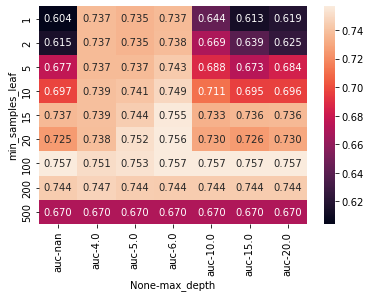

In [65]:
sns.heatmap(df_scores_pivot,annot=True,fmt='.3f')

In [66]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=15)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## 6.6 Ensembles and random forest
- Board of experts
- Ensembling models
- Random forest - ensembling decision trees
- Tuning random forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rf = RandomForestClassifier(n_estimators=10,random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [107]:
y_pred = rf.predict_proba(X_val)[:,1]

In [108]:
roc_auc_score(y_val,y_pred)

0.7342692380412176

In [117]:
rf.predict_proba(X_val[[0]])

array([[0.4, 0.6]])

In [124]:
scores=[]

for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n,random_state=1)
    rf.fit(X_train,y_train)
    
    y_pred  = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    scores.append((n,auc))

In [125]:
df_scores=pd.DataFrame(scores,columns=['n_estimators','auc'])
df_scores

,n_estimators,auc
0,10,0.751018
1,20,0.764612
2,30,0.778815
3,40,0.780910
4,50,0.787657
5,60,0.789683
6,70,0.789396
7,80,0.789226
8,90,0.790442
9,100,0.790212


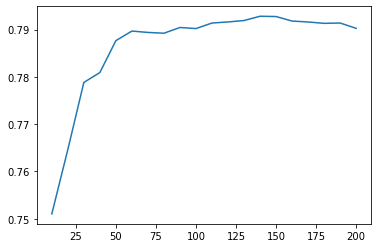

In [127]:
plt.plot(df_scores.n_estimators,df_scores.auc)

In [128]:
scores=[]

for d in [5,10,15]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                   random_state=1)
        rf.fit(X_train,y_train)
        
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        scores.append((d,n,auc))

In [138]:
columns = ['max_depth','n_estimators','auc']
df_scores = pd.DataFrame(scores,columns=columns)

In [139]:
df_scores

,max_depth,n_estimators,auc
0,5,10,0.793313
1,5,20,0.796817
2,5,30,0.795762
3,5,40,0.798021
4,5,50,0.800050
5,5,60,0.800536
6,5,70,0.799987
7,5,80,0.800208
8,5,90,0.800359
9,5,100,0.801071


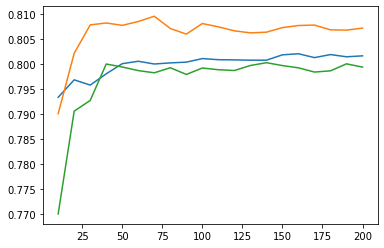

In [140]:
for d in [5,10,15]:
    df_subset = df_scores[df_scores.max_depth==d]
    plt.plot(df_subset.n_estimators,df_subset.auc,label='max_depth=%d'%d)

n=70 max_depth=10

In [141]:
max_depth=10

In [145]:
scores=[]

for s in [1,3,5,10,50]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n,
                                   max_depth=max_depth,
                                   min_samples_leaf=s,
                                   random_state=1)
        rf.fit(X_train,y_train)
        
        y_pred = rf.predict_proba(X_val)[:,1]
        auc=roc_auc_score(y_val,y_pred)
        scores.append((s,n,auc))

In [146]:
columns = ['min_samples_leaf','n_estimators','auc']
df_scores = pd.DataFrame(scores,columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.790036
1,1,20,0.802127
2,1,30,0.807821
3,1,40,0.808206
4,1,50,0.807727


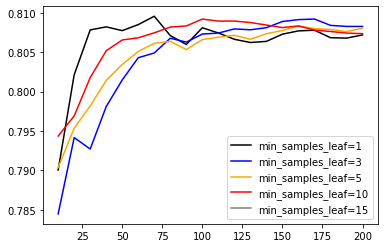

In [154]:
colors=['black','blue','orange','red','grey']
min_samples_leaf_values = [1,3,5,10,15]

for s,col in zip(min_samples_leaf_values,colors):
    df_subset=df_scores[df_scores.min_samples_leaf==s]
    plt.plot(df_subset.n_estimators,df_subset.auc,
             color=col,
            label = 'min_samples_leaf=%d'%s)
plt.legend()

In [153]:
colors=['black','blue','orange','red','grey']
min_samples_leaf_values = [1,3,5,10,15]
list(zip(min_samples_leaf_values,colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (15, 'grey')]

In [155]:
min_samples_leaf=3

In [156]:
rf = RandomForestClassifier(n_estimators=70,
                           max_depth=max_depth,
                           min_samples_leaf=min_samples_leaf,
                           random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=70,
                       random_state=1)

In [157]:
y_pred = rf.predict_proba(X_val)[:,1]

In [158]:
roc_auc_score(y_val,y_pred)

0.8048969559463035

## 6.7 Gradient boosting and XGBoost
- Gradient Boosting vs random forest
- Installing XGBoost
- Training the firt model 
- Performance monitoring
- Parsing xgboost's monitoring output

In [160]:
import xgboost as xgb

In [161]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train,label=y_train,feature_names=features)

C:\Users\Piyush Sharma\Desktop\ZCMP_CAR\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [163]:
dval = xgb.DMatrix(X_val,label=y_val,feature_names=features)

In [171]:
xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'nthread':8,
    'seed':1,
    'verbosity':1,
}


model = xgb.train(xgb_params,dtrain,num_boost_round=10)

In [172]:
y_pred = model.predict(dval)

In [173]:
roc_auc_score(y_val,y_pred)

0.7996313102665911

In [174]:
watchlist = [(dtrain , 'train'),(dval,'val')]

In [213]:
%%capture output

xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity':1,
}


model = xgb.train(xgb_params,dtrain,evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)

In [218]:
def parse_xgb_output(output):
    
    results=[]
    for line in output.stdout.strip().split('\n'):
        it_line,train_line,val_line=line.split('\t')
        
        it=int(it_line.strip('[]'))
        train=float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
       
        results.append((it,train,val))
        
    columns = ['num_iter','aucs_train','aucs_val']
    df_results = pd.DataFrame(results,columns=columns)
        
    return df_results

In [222]:
df_scores = parse_xgb_output(output)
df_scores

,num_iter,aucs_train,aucs_val
0,0,0.81777,0.75244
1,5,0.89278,0.79352
2,10,0.92092,0.79600
3,15,0.93864,0.80130
4,20,0.95208,0.79461
5,25,0.96180,0.79050
6,30,0.96740,0.78839
7,35,0.97206,0.78816
8,40,0.97611,0.78552
9,45,0.98170,0.78472


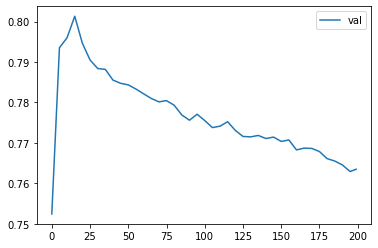

In [224]:

plt.plot(df_scores.num_iter,df_scores.aucs_val,label='val')
plt.legend()

## 6.8 XGBoost parameter tuning
Tuning the following parameters:
- `eta`
- `max_depth`
- `min_child_weight` 

In [249]:
scores = {}

In [269]:
%%capture output

xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity':1,
}


model = xgb.train(xgb_params,dtrain,evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)

In [270]:
'eta=%s'%(xgb_params['eta'])

'eta=0.3'

In [271]:
key = 'eta=%s'%(xgb_params['eta'])
scores[key] = parse_xgb_output(output)

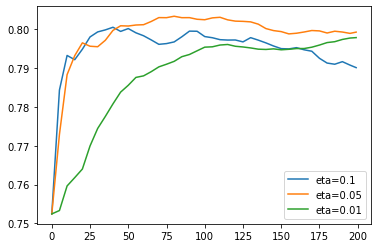

In [281]:
etas = ['eta=0.1','eta=0.05','eta=0.01']

for eta in etas:
    df_score=scores[eta]
    plt.plot(df_score.num_iter,df_score.aucs_val,label=eta)
plt.legend()

In [299]:
scores={}

In [328]:
%%capture output

xgb_params = {
    'eta':0.1,
    'max_depth':10,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity':1,
}


model = xgb.train(xgb_params,dtrain,evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)

In [319]:
key = 'max_depth=%s' %(xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

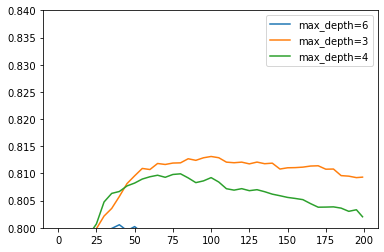

In [322]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter,df_score.aucs_val,label=max_depth)

plt.ylim(0.8,0.84)    
plt.legend()

In [329]:
key = 'max_depth=%s' %(xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [331]:
del scores['max_depth=10']

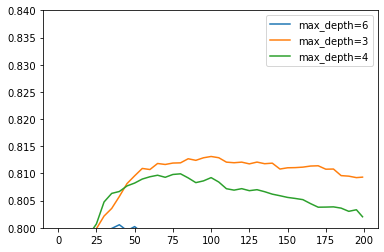

In [334]:
for max_depth ,df_score in scores.items():
    plt.plot(df_score.num_iter,df_score.aucs_val,label=max_depth)
plt.ylim(0.8,0.84) 
plt.legend()

In [340]:
scores={}

In [345]:
%%capture output

xgb_params = {
    'eta':0.1,
    'max_depth':10,
    'min_child_weight':30,
    
    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity':1,
}


model = xgb.train(xgb_params,dtrain,evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)

In [346]:
key = 'min_child_weight=%s' %(xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

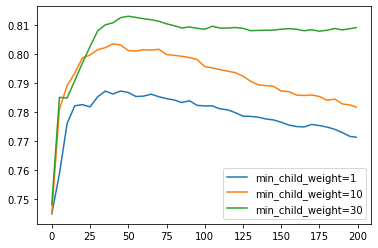

In [349]:
for min_child_weight, df_scores in scores.items():
    plt.plot(df_scores.num_iter,df_scores.aucs_val,label=min_child_weight)
plt.legend()

In [350]:
xgb_params = {
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':30,
    
    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity':1,
}


model = xgb.train(xgb_params,dtrain,num_boost_round=175)

## 6.9 Selecting the final  model 
- Choosing between xgboost, random forest and decision tree
- Training the final model
- Saving the model

In [352]:
dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=15)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [353]:
rf = RandomForestClassifier(n_estimators=200,
                           max_depth=10,
                            min_samples_leaf=3,
                           random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [354]:
xgb_params = {
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'verbosity':1,
}


model = xgb.train(xgb_params,dtrain,num_boost_round=175)

In [358]:
y_pred = model.predict(dval)
roc_auc_score(y_val,y_pred)

0.8108212012352682

In [359]:
df_full_train.reset_index(drop=True)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,5,private,60,24,married,no,fixed,45,959.0,300000.0,30000.0,1000,1282
1,ok,14,parents,60,32,married,yes,fixed,35,959.0,300000.0,30000.0,1150,1273
2,ok,25,owner,12,43,married,no,freelance,75,959.0,300000.0,30000.0,600,841
3,ok,18,rent,60,37,married,no,fixed,70,959.0,300000.0,30000.0,1300,1345
4,default,1,parents,48,24,single,yes,fixed,35,959.0,300000.0,30000.0,900,1061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,ok,31,owner,48,57,married,yes,freelance,60,959.0,300000.0,30000.0,600,887
3559,ok,19,owner,60,46,married,no,freelance,60,959.0,300000.0,30000.0,1500,2755
3560,ok,15,owner,60,55,married,no,freelance,60,959.0,300000.0,30000.0,1200,1710
3561,ok,12,rent,48,36,married,no,fixed,80,959.0,300000.0,30000.0,1800,2272


In [360]:
y_full_train = (df_full_train.status=='default').astype(int).values

In [361]:
y_full_train

array([0, 0, 0, ..., 0, 0, 0])

In [362]:
del df_full_train['status']

In [363]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [365]:
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)


In [366]:
dfulltrain = xgb.DMatrix(X_full_train,label=y_full_train,
                         feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test,feature_names=dv.get_feature_names())

C:\Users\Piyush Sharma\Desktop\ZCMP_CAR\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [367]:
xgb_params = {
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':1,
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1
}

model = xgb.train(xgb_params,dfulltrain,num_boost_round=175)

In [368]:
y_pred = model.predict(dtest)

In [369]:
roc_auc_score(y_test,y_pred)

0.8052783899639147